In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Shape of Image is (1367, 1025, 3)


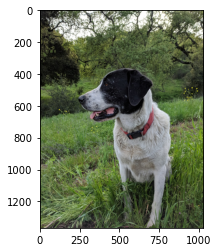

In [58]:
img = cv2.cvtColor(cv2.imread("Bruno.jpg"),cv2.COLOR_BGR2RGB)
print("Shape of Image is {}".format(img.shape))
plt.imshow(img)

Shape of  Mask is (375, 486, 3)


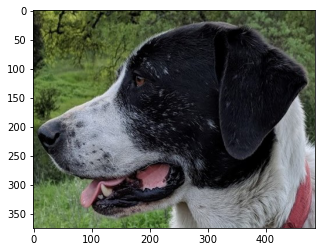

In [59]:
find_img = cv2.cvtColor(cv2.imread("Bruno_face.jpg"),cv2.COLOR_BGR2RGB)
print("Shape of  Mask is {}".format(find_img.shape))
plt.imshow(find_img)

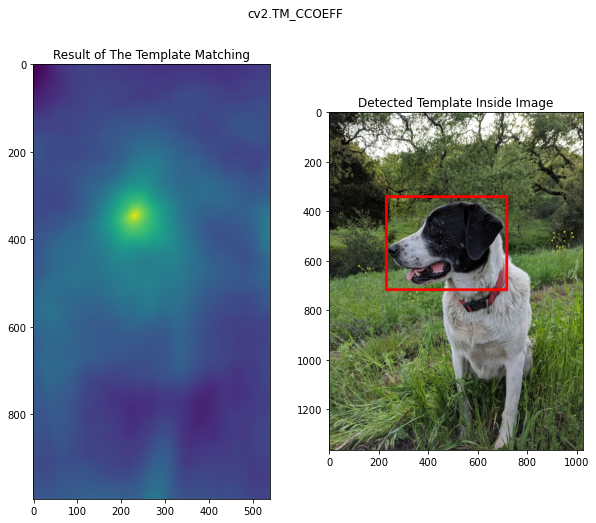

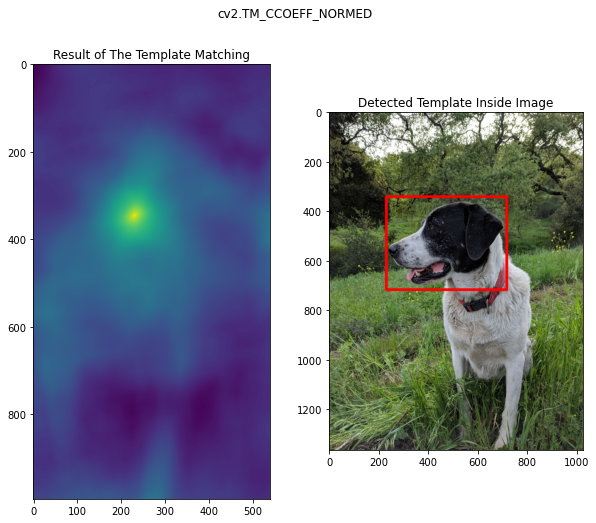

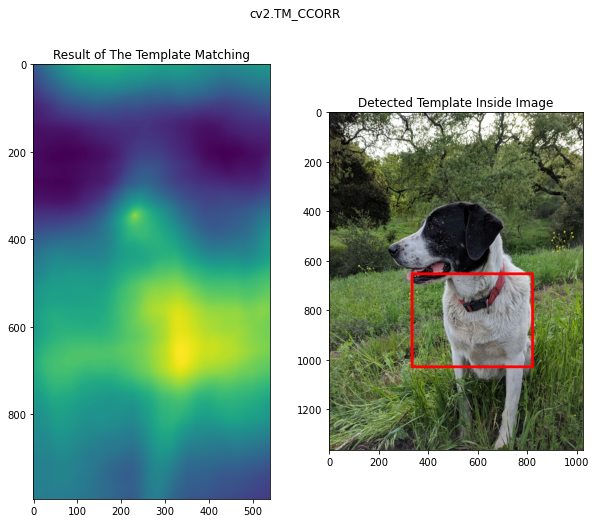

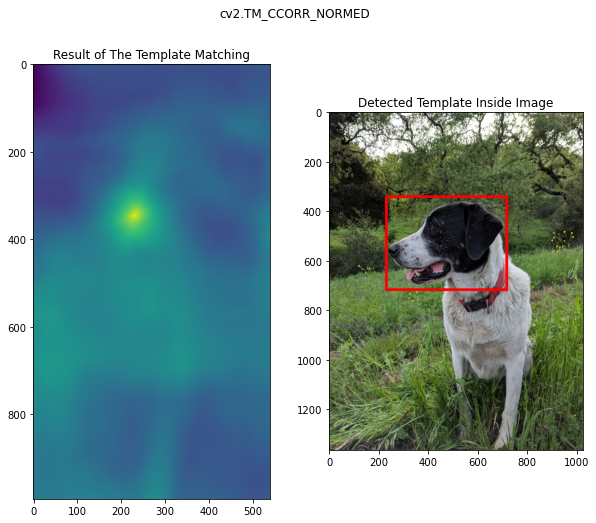

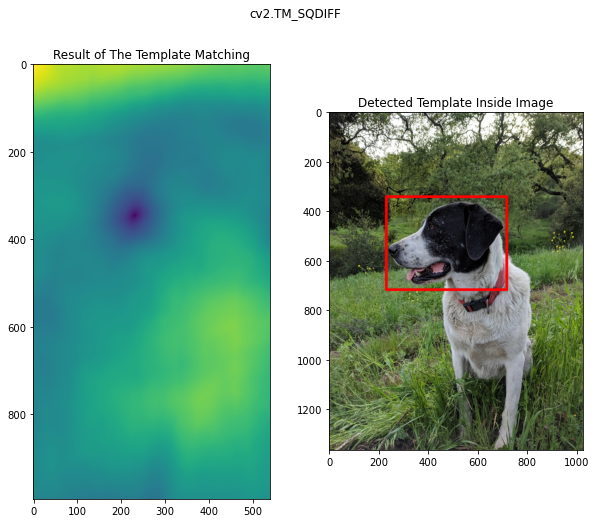

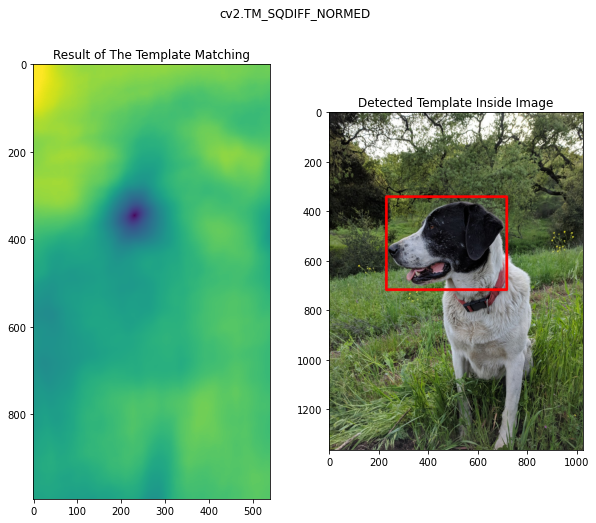

In [61]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for m in methods:
    
#we need to make copy  because if not then it will overwite on same image
    img_copy = img.copy()
    method = eval(m)
    result = cv2.matchTemplate(img_copy,find_img,method)
    min_v, max_v,min_l,max_l = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        L_Top = min_l
    else:
        L_Top = max_l
    R_Bottom = (L_Top[0]+ find_img.shape[1],L_Top[1] + find_img.shape[0])
    cv2.rectangle(img_copy,L_Top,R_Bottom,(255,0,0),10)
    
    fig = plt.figure(figsize=(10,8))
    plt.subplot(121)
    plt.imshow(result)
    plt.title('Result of The Template Matching')

    plt.subplot(122)
    plt.imshow(img_copy)
    plt.title('Detected Template Inside Image')
    plt.suptitle(m)
    plt.show()
    
